In [ ]:
!git clone https://github.com/BryantSmith91/MoreFinalData.git

In [2]:
import matplotlib.pyplot as plt
import socket
import glob
import os
import numpy as np
import tensorflow as tf
from keras.models import Model
from keras.optimizers import RMSprop
from keras.layers import Input,Conv2D,MaxPooling2D,UpSampling2D,concatenate,Conv2DTranspose
from glob import glob

In [3]:
data = glob('MoreFinalData/*')
len(data)

6000

In [4]:
import skimage
from tensorflow.keras.preprocessing import image

matrix = []
array = []

for x in range(0, len(data)):
    image_size =(224,224)
    im = image.load_img(data[x], target_size=image_size, color_mode='grayscale')
    matrix.append(im)
    array.append(skimage.img_as_float(matrix[x]))
imagearray = np.asarray(array)

In [5]:
imagearray = imagearray.reshape(-1, 224,224, 1)

In [6]:
batch_size = 52
epochs = 50
inChannel = 1
x, y = 224, 224
input_img= Input(shape=(x,y,inChannel))

W0822 11:06:02.982404  1072 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0822 11:06:03.014065  1072 deprecation_wrapper.py:119] From C:\Users\bryan\Miniconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.



In [7]:
from sklearn.model_selection import train_test_split


train_X, real_X, train_ground, real_ground = train_test_split(imagearray, imagearray, 
                                                    test_size=0.2,
                                                    random_state=13)

In [8]:
real_X.shape
train_X.shape

(4800, 224, 224, 1)

In [ ]:
def autoencoder(input_img):
    #encoder
    #input = 28 x 28 x 1 (wide and thin)
    conv1 = Conv2D(32, (3, 3), activation='relu', padding='same')(input_img) #28 x 28 x 32
    pool1 = MaxPooling2D(pool_size=(2, 2))(conv1) #14 x 14 x 32
    conv2 = Conv2D(64, (3, 3), activation='relu', padding='same')(pool1) #14 x 14 x 64
    pool2 = MaxPooling2D(pool_size=(2, 2))(conv2) #7 x 7 x 64
    conv3 = Conv2D(128, (3, 3), activation='relu', padding='same')(pool2) #7 x 7 x 128 (small and thick)
    pool3 = MaxPooling2D(pool_size=(2, 2))(conv3) #7 x 7 x 64
    conv4 = Conv2D(256, (3, 3), activation='relu', padding='same')(pool3) #7 x 7 x 256
    pool4 = MaxPooling2D(pool_size=(2, 2))(conv4)
    conv5 = Conv2D(512, (3, 3), activation='relu', padding='same')(pool4)
#     conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    
    #decoder
    
    conv6 = Conv2D(512, (3, 3), activation='relu', padding='same')(conv5)
    up1 = concatenate([Conv2DTranspose(256, (2, 2), strides=(2, 2), padding='same')(conv6), conv4], axis=3)
    conv7 = Conv2D(256, (3, 3), activation='relu', padding='same')(up1)
    up2 = concatenate([Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(conv7), conv3], axis=3)
    conv8 = Conv2D(128, (3, 3), activation='relu', padding='same')(up2)
    up3 = concatenate([Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(conv8), conv2], axis=3)
    conv9 = Conv2D(64, (3, 3), activation='relu', padding='same')(up3)
    up4 = concatenate([Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(conv9), conv1], axis=3)
    conv10 = Conv2D(32, (3, 3), activation='relu', padding='same')(up4)
    decoded = Conv2D(1, (3, 3), activation='sigmoid', padding='same')(conv10)
    return decoded

In [ ]:
autoencoder = Model(input_img, autoencoder(input_img))
autoencoder.compile(loss='mean_squared_error', optimizer = RMSprop())

In [ ]:
autoencoder.summary()

In [ ]:
autoencoder_train = autoencoder.fit(train_X, train_ground,batch_size=batch_size,epochs=epochs,verbose=1,validation_data=(real_X, real_ground))

In [ ]:
autoencoder.save_weights('lastgpu.h5')

In [ ]:
autoencoder.load_weights('lastgpu.h5')

In [ ]:
autoencoder.compile(loss='mean_squared_error',optimizer=RMSprop())

In [9]:
pred = autoencoder.predict(real_X)

NameError: name 'autoencoder' is not defined

In [10]:
#maybe not massively overfitting this time?
loss = autoencoder_train.history['loss']
val_loss = autoencoder_train.history['val_loss']
epochs = range(50)
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

NameError: name 'autoencoder_train' is not defined

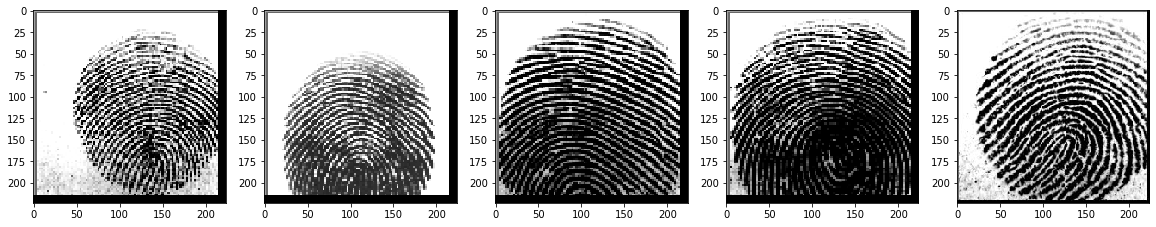

NameError: name 'pred' is not defined

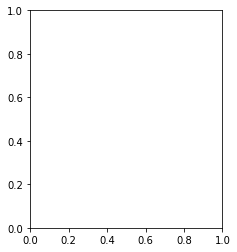

In [11]:
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(real_ground[i,...,0],cmap='gray')
plt.show()
plt.figure(figsize=(20,4))
for i in range(5):
    plt.subplot(1,5,i+1)
    plt.imshow(pred[i,...,0],cmap='gray')
plt.show()